In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('health.csv',encoding='latin-1')

In [3]:
df

,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,LocationID,CategoryID,MeasureId,DataValueTypeID,Geolocation
0,2019,FL,Florida,Polk,BRFSS,Health Outcomes,Arthritis among adults aged >=18 years,%,Crude prevalence,25.9,25.0,26.7,"724,777",12105,HLTHOUT,ARTHRITIS,CrdPrv,POINT (-81.69731123 27.94877779)
1,2019,GA,Georgia,Cook,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,39.6,38.3,40.9,"17,270",13075,HLTHOUT,OBESITY,CrdPrv,POINT (-83.43045437 31.15442459)
2,2018,GA,Georgia,Crisp,BRFSS,Prevention,Mammography use among women aged 50-74 years,%,Crude prevalence,74.7,71.4,77.7,"22,372",13081,PREVENT,MAMMOUSE,CrdPrv,POINT (-83.76805172 31.92295332)
3,2019,GA,Georgia,Dade,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,32.2,30.5,33.7,"16,116",13083,HLTHOUT,OBESITY,CrdPrv,POINT (-85.50487967 34.8543477)
4,2019,GA,Georgia,Dawson,BRFSS,Health Outcomes,Obesity among adults aged >=18 years,%,Crude prevalence,30.1,28.5,31.7,"26,108",13085,HLTHOUT,OBESITY,CrdPrv,POINT (-84.16999662 34.44372498)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187651,2019,WA,Washington,Pierce,BRFSS,Prevention,Taking medicine for high blood pressure contro...,%,Age-adjusted prevalence,49.6,48.9,50.3,"904,980",53053,PREVENT,BPMED,AgeAdjPrv,POINT (-122.111739 47.02666169)
187652,2019,WI,Wisconsin,Monroe,BRFSS,Prevention,Visits to doctor for routine checkup within th...,%,Crude prevalence,76.1,74.9,77.1,"46,253",55081,PREVENT,CHECKUP,CrdPrv,POINT (-90.61805985 43.94579217)
187653,2018,WI,Wisconsin,Menominee,BRFSS,Health Outcomes,All teeth lost among adults aged >=65 years,%,Age-adjusted prevalence,25.1,19.9,30.5,"4,556",55078,HLTHOUT,TEETHLOST,AgeAdjPrv,POINT (-88.70956936 45.00427592)
187654,2019,WV,West Virginia,Jackson,BRFSS,Prevention,Taking medicine for high blood pressure contro...,%,Crude prevalence,81.1,80.0,82.2,"28,576",54035,PREVENT,BPMED,CrdPrv,POINT (-81.67465518 38.83452283)


In [4]:
 ds=df.drop(['Year','LocationName','StateAbbr','DataSource','Category','Data_Value_Unit','LocationID','CategoryID','DataValueTypeID','DataValueTypeID','Geolocation'],axis=1)

In [5]:
ds

,StateDesc,Measure,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,MeasureId
0,Florida,Arthritis among adults aged >=18 years,Crude prevalence,25.9,25.0,26.7,"724,777",ARTHRITIS
1,Georgia,Obesity among adults aged >=18 years,Crude prevalence,39.6,38.3,40.9,"17,270",OBESITY
2,Georgia,Mammography use among women aged 50-74 years,Crude prevalence,74.7,71.4,77.7,"22,372",MAMMOUSE
3,Georgia,Obesity among adults aged >=18 years,Crude prevalence,32.2,30.5,33.7,"16,116",OBESITY
4,Georgia,Obesity among adults aged >=18 years,Crude prevalence,30.1,28.5,31.7,"26,108",OBESITY
...,...,...,...,...,...,...,...,...
187651,Washington,Taking medicine for high blood pressure contro...,Age-adjusted prevalence,49.6,48.9,50.3,"904,980",BPMED
187652,Wisconsin,Visits to doctor for routine checkup within th...,Crude prevalence,76.1,74.9,77.1,"46,253",CHECKUP
187653,Wisconsin,All teeth lost among adults aged >=65 years,Age-adjusted prevalence,25.1,19.9,30.5,"4,556",TEETHLOST
187654,West Virginia,Taking medicine for high blood pressure contro...,Crude prevalence,81.1,80.0,82.2,"28,576",BPMED


data preprocessing

In [6]:
ds.shape

(187656, 8)

In [7]:
ds.isnull().any()

StateDesc                False
Measure                  False
Data_Value_Type          False
Data_Value               False
Low_Confidence_Limit     False
High_Confidence_Limit    False
TotalPopulation          False
MeasureId                False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001CD356D8>,
      dtype=object)

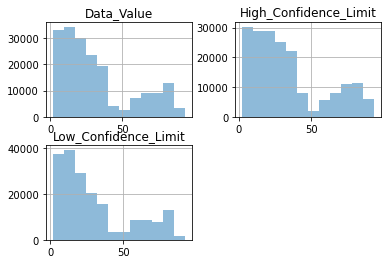

In [8]:
ds.hist(bins=12, alpha=0.5)

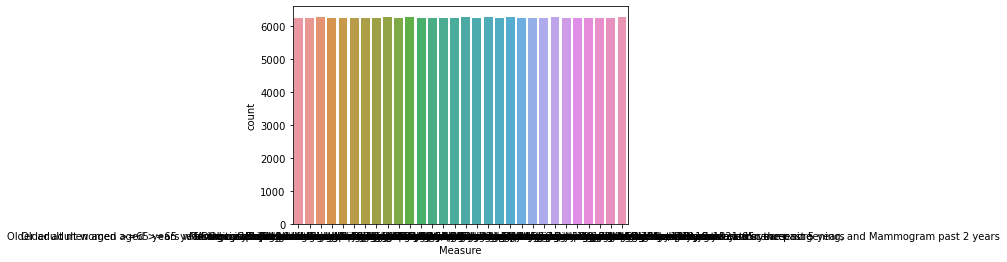

In [9]:
sns.countplot(x="Measure", data=df)

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
lb=LabelEncoder()

In [12]:
ds['StateDesc']=lb.fit_transform(ds['StateDesc'])
ds['Measure']=lb.fit_transform(ds['Measure'])
ds['Data_Value_Type']=lb.fit_transform(ds['Data_Value_Type'])
ds['MeasureId']=lb.fit_transform(ds['MeasureId'])

ds["TotalPopulation"] = ds["TotalPopulation"].str.replace(",","").astype(float)

In [13]:
ds

,StateDesc,Measure,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,MeasureId
0,9,1,1,25.9,25.0,26.7,724777.0,1
1,10,21,1,39.6,38.3,40.9,17270.0,25
2,10,18,1,74.7,71.4,77.7,22372.0,23
3,10,21,1,32.2,30.5,33.7,16116.0,25
4,10,21,1,30.1,28.5,31.7,26108.0,25
...,...,...,...,...,...,...,...,...
187651,48,27,0,49.6,48.9,50.3,904980.0,4
187652,50,29,1,76.1,74.9,77.1,46253.0,9
187653,50,0,0,25.1,19.9,30.5,4556.0,29
187654,49,27,1,81.1,80.0,82.2,28576.0,4


In [14]:
ds.corr()

,StateDesc,Measure,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,MeasureId
StateDesc,1.000000e+00,1.241607e-04,2.851405e-19,-0.001092,-0.001695,-0.000515,1.870987e-02,1.568913e-04
Measure,1.241607e-04,1.000000e+00,-4.725666e-18,0.248951,0.241544,0.255296,1.798478e-05,3.675876e-01
Data_Value_Type,2.851405e-19,-4.725666e-18,1.000000e+00,0.039684,0.036681,0.043113,2.939267e-18,-3.281380e-20
Data_Value,-1.092344e-03,2.489511e-01,3.968381e-02,1.000000,0.997754,0.997429,-1.064982e-03,-1.702736e-01
Low_Confidence_Limit,-1.694678e-03,2.415440e-01,3.668071e-02,0.997754,1.000000,0.990431,3.053249e-04,-1.851677e-01
High_Confidence_Limit,-5.147244e-04,2.552961e-01,4.311256e-02,0.997429,0.990431,1.000000,-2.438277e-03,-1.547685e-01
TotalPopulation,1.870987e-02,1.798478e-05,2.939267e-18,-0.001065,0.000305,-0.002438,1.000000e+00,2.272583e-05
MeasureId,1.568913e-04,3.675876e-01,-3.281380e-20,-0.170274,-0.185168,-0.154769,2.272583e-05,1.000000e+00


In [15]:
ds.describe()

,StateDesc,Measure,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,MeasureId
count,187656.000000,187656.000000,187656.000000,187656.000000,187656.000000,187656.000000,1.876560e+05,187656.000000
mean,26.341284,14.504252,0.500000,31.724481,29.748927,33.756836,2.078160e+05,14.505372
std,14.474265,8.657463,0.500001,24.828821,24.479171,25.216044,5.875963e+06,8.654334
min,0.000000,0.000000,0.000000,1.800000,1.600000,2.000000,8.600000e+01,0.000000
25%,14.000000,7.000000,0.000000,12.600000,10.800000,14.100000,1.080300e+04,7.000000
50%,25.000000,15.000000,0.500000,23.800000,20.700000,26.800000,2.561600e+04,14.500000
75%,40.000000,22.000000,1.000000,40.800000,39.100000,43.600000,6.705500e+04,22.000000
max,51.000000,29.000000,1.000000,93.200000,92.600000,93.700000,3.282395e+08,29.000000


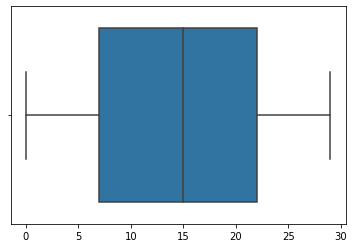

In [16]:
sns.boxplot(x=['Measure'],data=ds)

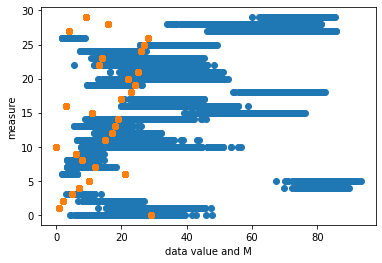

In [17]:
plt.xlabel('data value and M')
plt.ylabel('measure')
plt.scatter(ds['Data_Value'], ds['Measure'])
plt.scatter(ds['MeasureId'],ds['Measure'])
plt.show()

In [18]:
x=ds.drop(['Measure'],axis=1).values
x

array([[9.00000e+00, 1.00000e+00, 2.59000e+01, ..., 2.67000e+01,
        7.24777e+05, 1.00000e+00],
       [1.00000e+01, 1.00000e+00, 3.96000e+01, ..., 4.09000e+01,
        1.72700e+04, 2.50000e+01],
       [1.00000e+01, 1.00000e+00, 7.47000e+01, ..., 7.77000e+01,
        2.23720e+04, 2.30000e+01],
       ...,
       [5.00000e+01, 0.00000e+00, 2.51000e+01, ..., 3.05000e+01,
        4.55600e+03, 2.90000e+01],
       [4.90000e+01, 1.00000e+00, 8.11000e+01, ..., 8.22000e+01,
        2.85760e+04, 4.00000e+00],
       [5.00000e+01, 1.00000e+00, 2.35000e+01, ..., 2.45000e+01,
        1.04646e+05, 2.00000e+00]])

In [19]:
y=ds['Measure'].values
y

array([ 1, 21, 18, ...,  0, 27,  2])

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
import warnings

warnings.filterwarnings('ignore')

In [28]:
 from sklearn import metrics

In [22]:

#from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
lb=LogisticRegression()
lb.fit(X_train, y_train)
y_predict_lr=lb.predict(X_test)

In [29]:
accuracy = metrics.accuracy_score(y_test, y_predict_lr)
accuracy 

0.9272887136310348

In [31]:
precision = metrics.precision_score(y_test,y_predict_lr,average='macro' )
precision   

0.9295094014860966

In [33]:
recall = metrics.recall_score(y_test,y_predict_lr,average='macro')
recall

0.9281145843723828

In [34]:
print(metrics.classification_report(y_test, y_predict_lr))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1234
           1       0.90      0.92      0.91      1281
           2       0.92      0.95      0.94      1250
           3       0.88      0.96      0.92      1257
           4       0.99      0.99      0.99      1243
           5       0.94      0.98      0.96      1237
           6       1.00      1.00      1.00      1302
           7       0.98      0.97      0.97      1247
           8       1.00      0.88      0.94      1297
           9       0.85      0.89      0.87      1269
          10       0.99      0.90      0.95      1299
          11       0.79      0.81      0.80      1222
          12       0.94      0.91      0.93      1256
          13       0.81      0.95      0.88      1219
          14       0.91      0.77      0.83      1269
          15       0.95      0.96      0.95      1205
          16       0.98      0.97      0.98      1246
          17       0.92    

In [23]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_predict_lr)

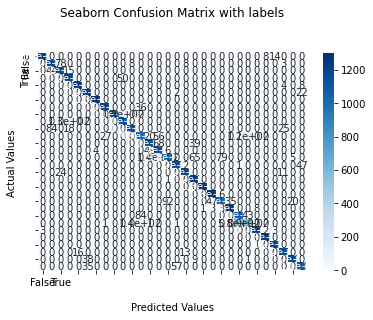

In [24]:
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

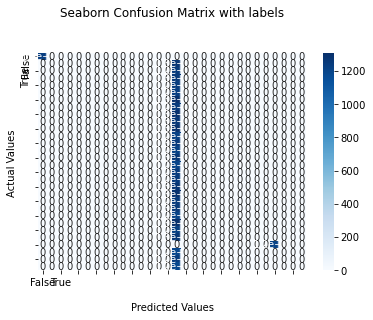